# import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets
import seaborn as sns

# read data

In [2]:
data = pd.read_csv('./p2p.csv', index_col=0)

# select useful data

In [3]:
y = data.status
data = data.drop(['status', 'nace'], axis=1)

# LLE 

In [4]:
X_r, err = manifold.locally_linear_embedding(data, n_neighbors=15,
                                             n_components=2, random_state=0)

LLEresult = pd.DataFrame(X_r)
LLEresult['y'] = y

In [5]:
def colors(row):
    if row==True:
        return 'red'
    else:
        return 'blue'
colors = y.apply(colors)

# plot the result

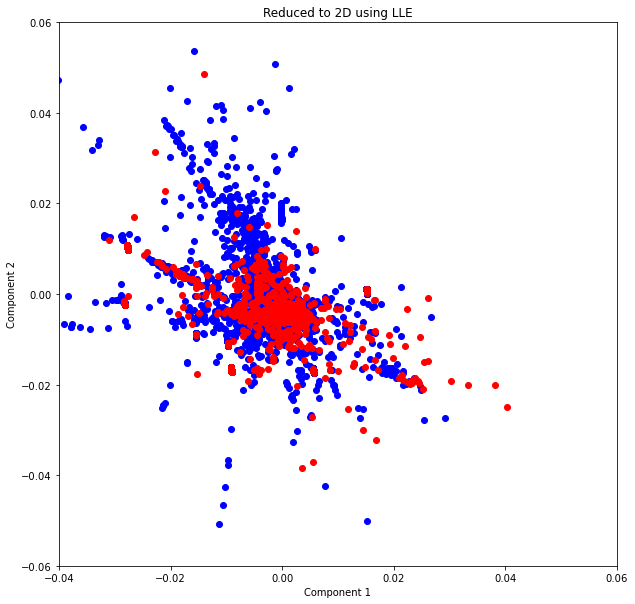

In [6]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(X_r[colors=='blue',0], X_r[colors=='blue',1], marker='o', c='blue')
plt.scatter(X_r[colors=='red',0], X_r[colors=='red',1], marker='o', c='red')
plt.ylim((-0.06, 0.06))
plt.xlim((-0.04, 0.06))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Reduced to 2D using LLE')
plt.savefig('./LLE_reduce.png', transparent=True)

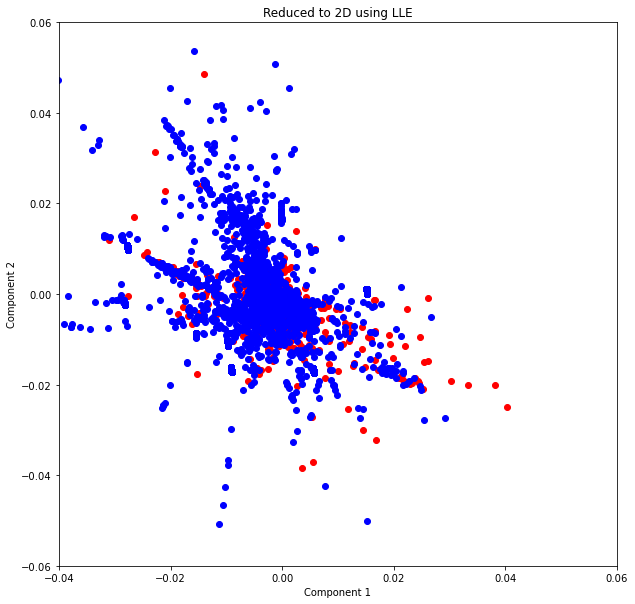

In [7]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(X_r[colors=='red',0], X_r[colors=='red',1], marker='o', c='red')
plt.scatter(X_r[colors=='blue',0], X_r[colors=='blue',1], marker='o', c='blue')
plt.ylim((-0.06, 0.06))
plt.xlim((-0.04, 0.06))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Reduced to 2D using LLE')
plt.savefig('./LLE_reduce2.png', transparent=True)

# set the dimension to 10

In [8]:
X_r2, err2 = manifold.locally_linear_embedding(data, n_neighbors=15,
                                             n_components=10, random_state=0)

LLEresult2 = pd.DataFrame(X_r2)
LLEresult2['y'] = y

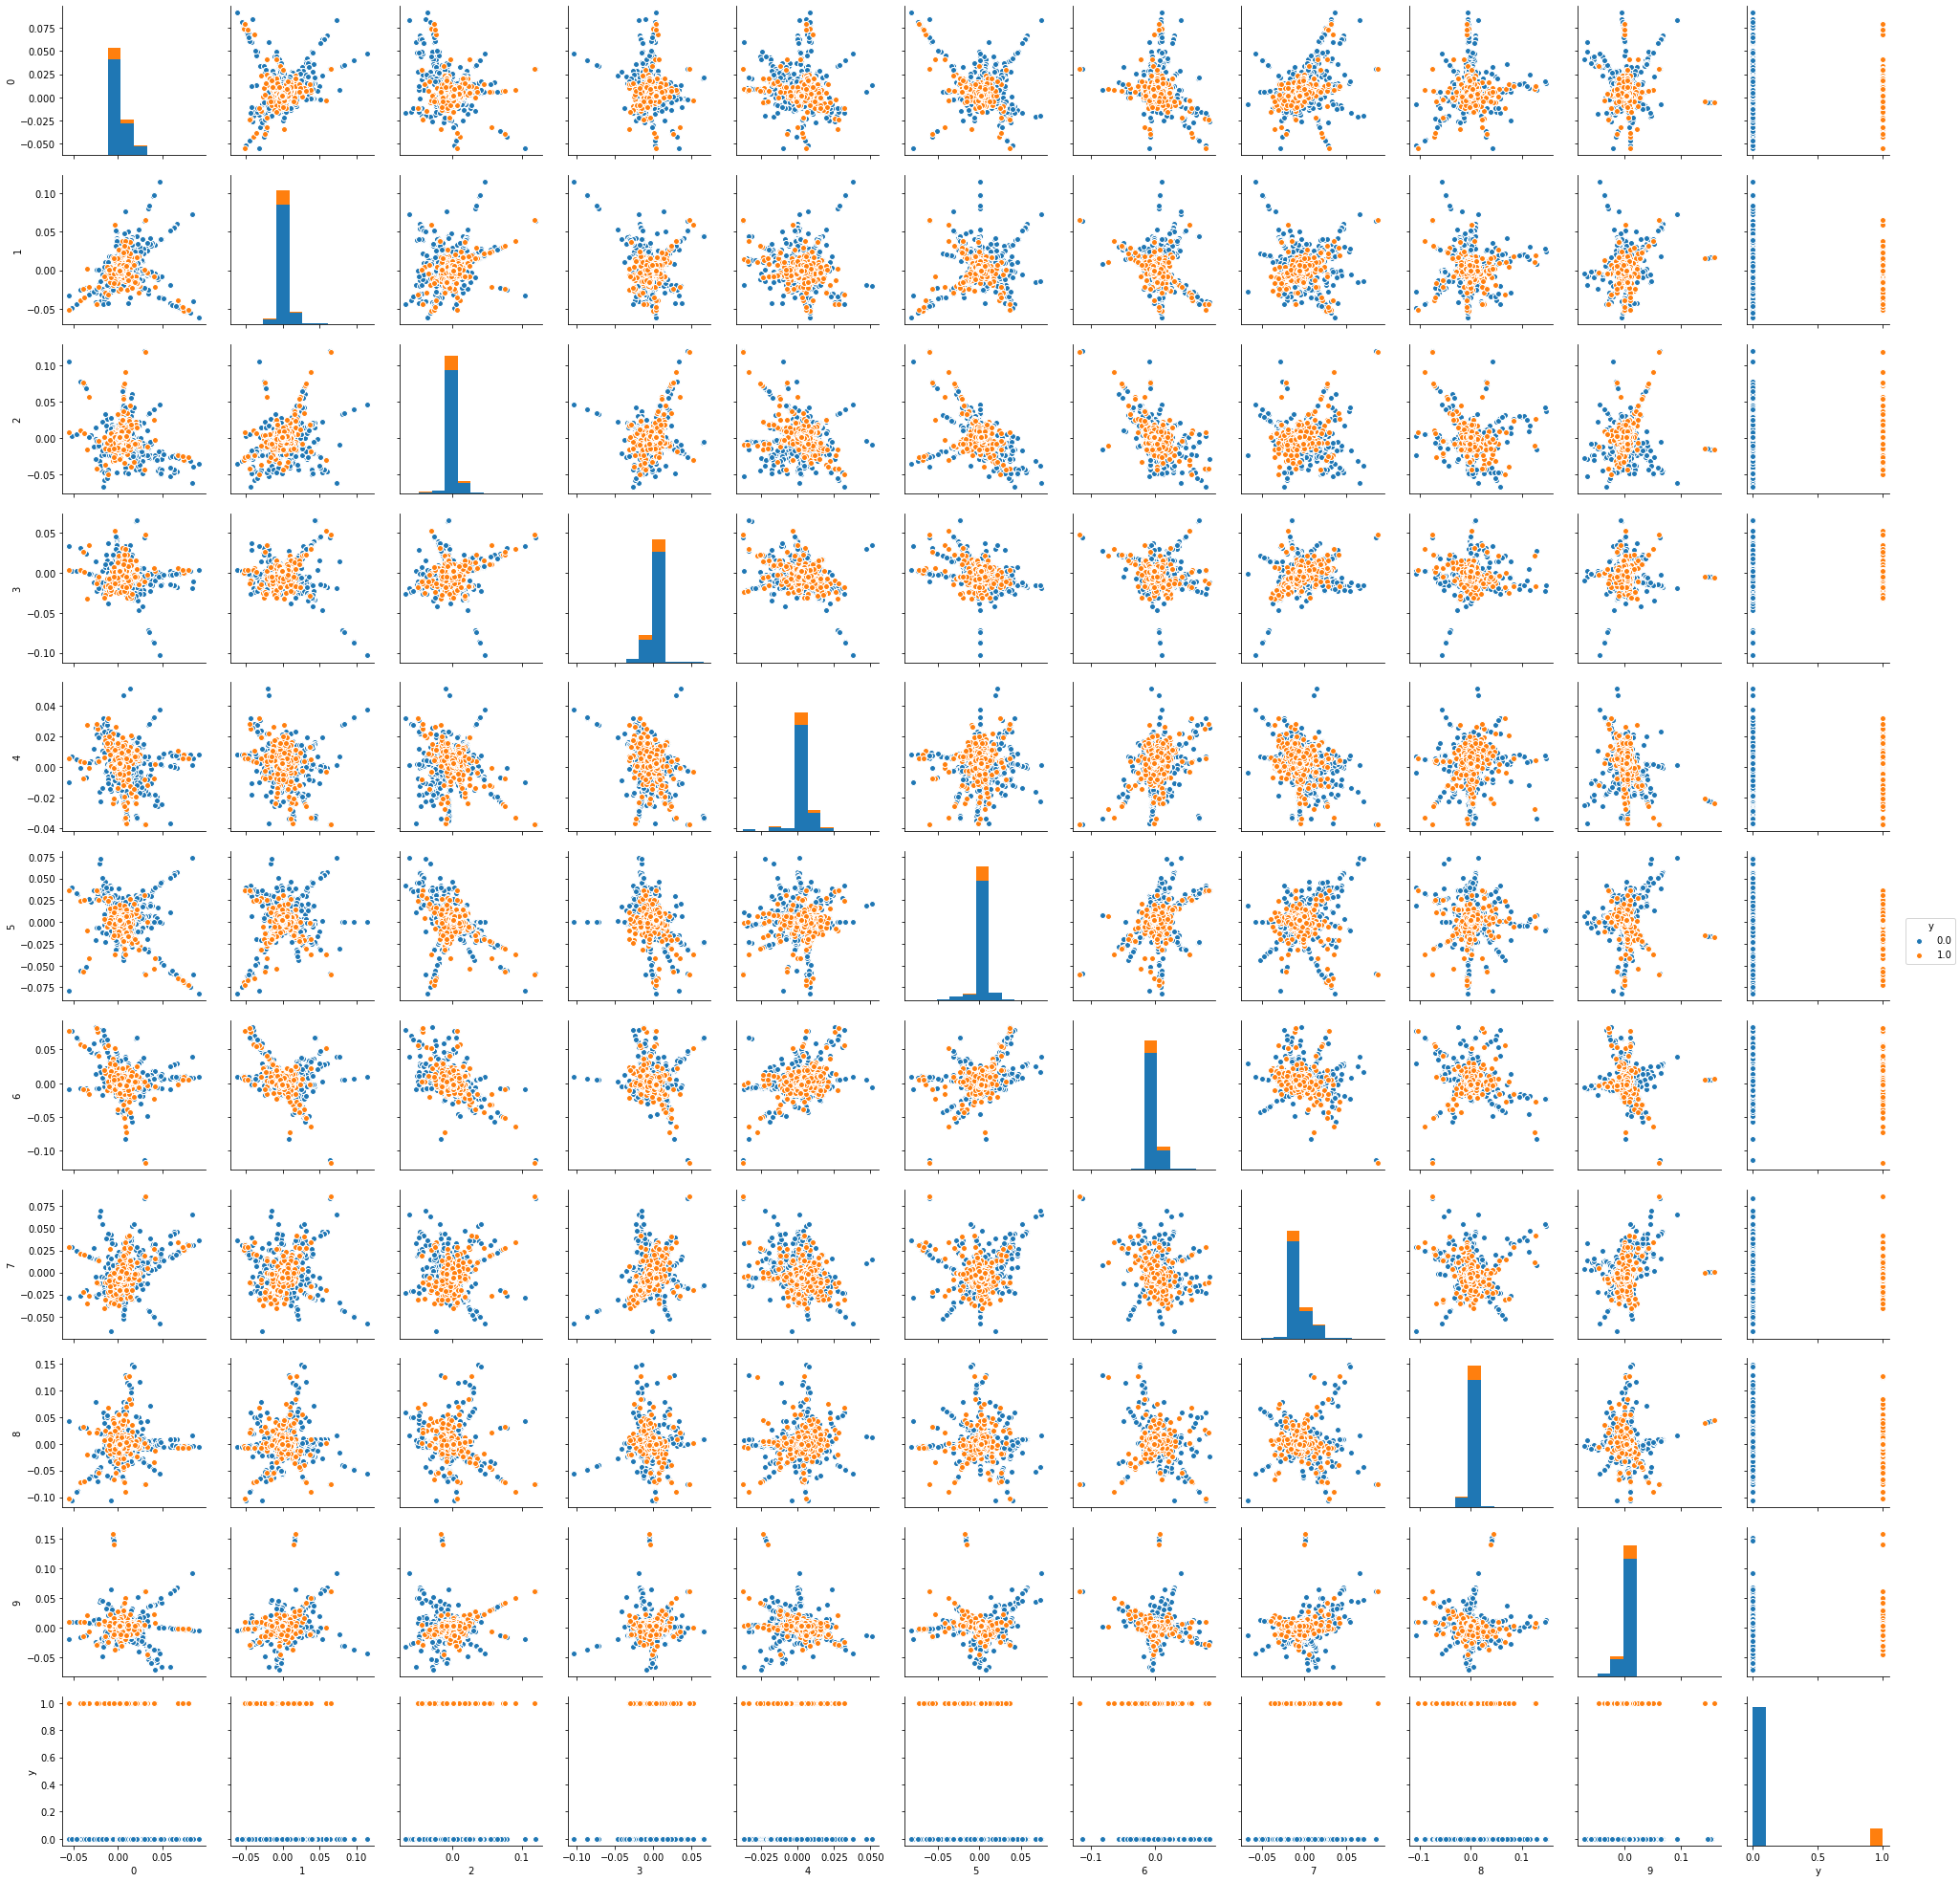

In [9]:
sns_plot = sns.pairplot(LLEresult2, hue="y")
sns_plot.savefig("p2p_LLE_n_components10.png")